# Lab 5


## Exercise 0: Commiting previous labs

There doesn't seem to be an easy way to setup a private repository that has been forked. Therefore we are going to attempt a work around: each of you will create your own private repository for storing your solutions and add course instructors as members.

### Part a

In a terminal, create make a copy of the repository you have been using. For example, navigate into the correct directory in your file system and use `cp -r Data1402.2021.Spring Data1402.Solutions.$USER`.

Go through the new directory and delete any data (any large CSV files) you have created. For example: `rm Data1402.Solutions.$USER/Labs/*/*.csv`.

Also remove the checkpoints: `rm -rf Data1402.Solutions.$USER/Labs/*/.ipynb_checkpoints`

### Part b
Remove the ".git" directory, for example `rm -rf Data1402.Solutions.$USER/.git`.


### Part c

Use [Github's Create a new repository form](https://github.com/new) to create a repository, named as specificed above.

### Part d

Follow the instructions provided after creating the repository to initialize the directory as a git repository. Commit and push your solutions.

### Part e

On the github page for your repository, goto the settings top tab and select manage access on side tab. Invite user `afarbin@gmail.com` as a collaborator.


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [1]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

In [2]:
filename="../../../Data/SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

In [7]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA). 

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

In [3]:
import sklearn as skl

In [15]:
from sklearn import linear_model

### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). 

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [4]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()
RawFish=DA.LinearDiscriminantAnalysis()
FeaFish=DA.LinearDiscriminantAnalysis()

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [5]:
N_Train=4000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]


In [8]:
Raw_X_Train=Train_Sample[RawNames]
Raw_y_Train=Train_Sample["signal"]

Raw_X_Test=Test_Sample[RawNames]
Raw_y_Test=Test_Sample["signal"]


Raw_Test_sig=Test_Sample[Test_Sample.signal==1][["signal"]+RawNames]
Raw_Test_bkg=Test_Sample[Test_Sample.signal==0][["signal"]+RawNames]

In [9]:
Fea_X_Train=Train_Sample[FeatureNames]
Fea_y_Train=Train_Sample["signal"]

Fea_X_Test=Test_Sample[FeatureNames]
Fea_y_Test=Test_Sample["signal"]


Fea_Test_sig=Test_Sample[Test_Sample.signal==1][["signal"]+FeatureNames]
Fea_Test_bkg=Test_Sample[Test_Sample.signal==0][["signal"]+FeatureNames]

We can train the classifier as follow:

In [10]:
Fisher.fit(X_Train,y_Train)

LinearDiscriminantAnalysis()

We can plot the output, comparing signal and background:

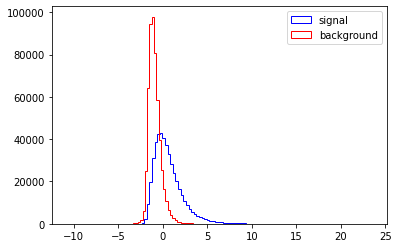

In [11]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

In [ ]:
#no

In [12]:
from sklearn.metrics import roc_curve, auc

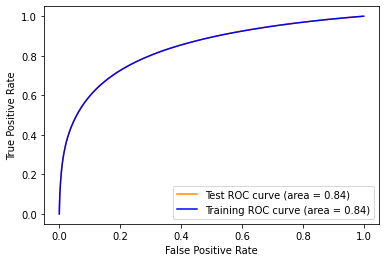

In [13]:
Tefpr, Tetpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))
Teroc_auc = auc(Tefpr, Tetpr)

Trfpr, Trtpr, _ = roc_curve(y_Train, Fisher.decision_function(X_Train))
Trroc_auc = auc(Trfpr, Trtpr)

plt.plot(Tefpr,Tetpr,color='darkorange',label='Test ROC curve (area = %0.2f)' % Teroc_auc)
plt.plot(Trfpr,Trtpr,color='blue',label='Training ROC curve (area = %0.2f)' % Trroc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot. 

In [16]:
raw = linear_model.Ridge()
rawplus = linear_model.Ridge()

In [19]:
Fisher.fit(X_Train,y_Train)
RawFish.fit(Raw_X_Train,Raw_y_Train)
FeaFish.fit(Fea_X_Train,Fea_y_Train)

LinearDiscriminantAnalysis()

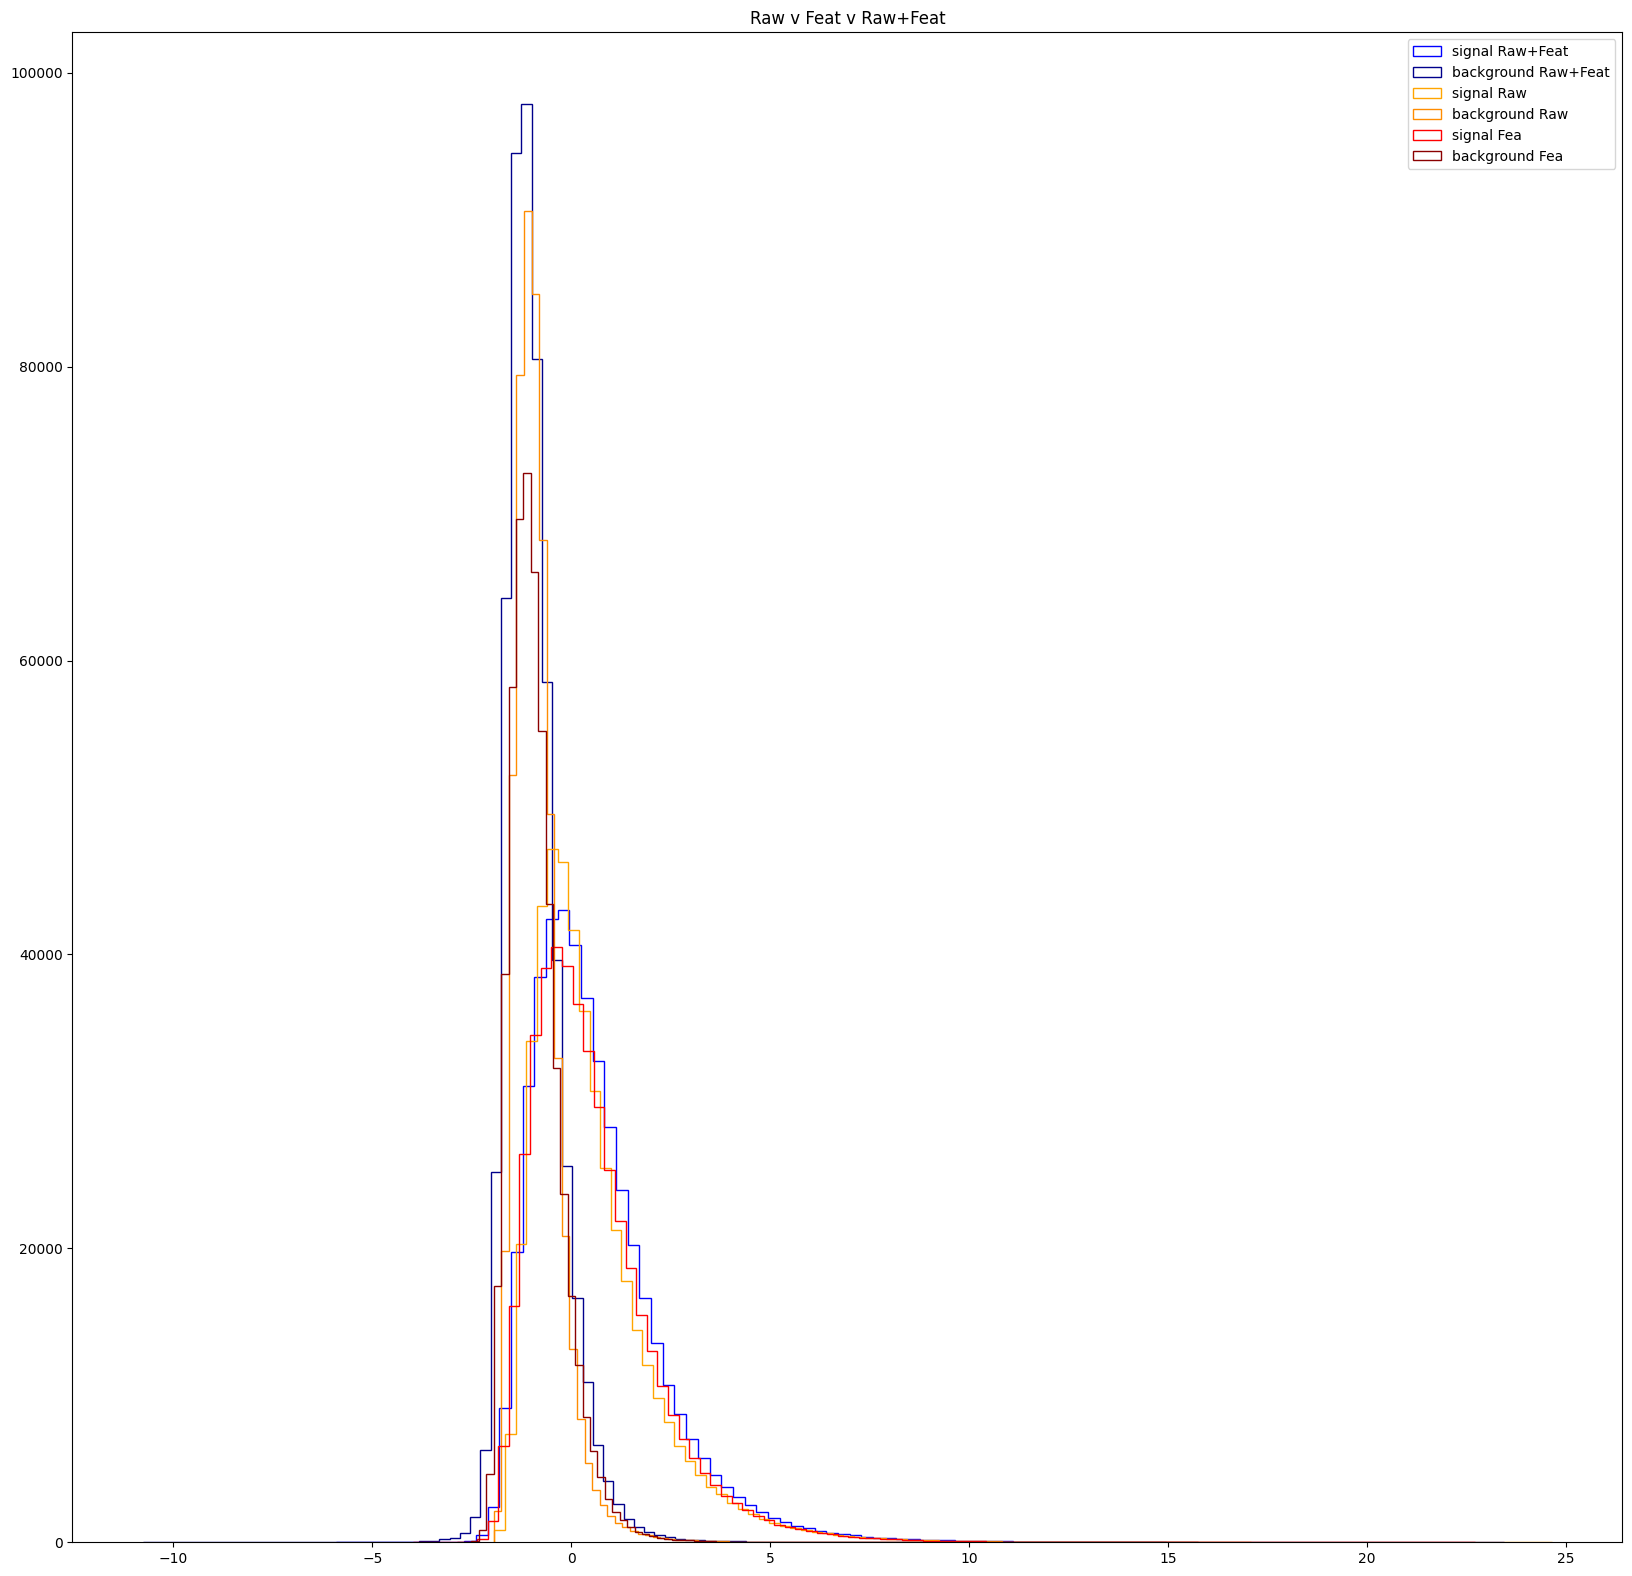

In [20]:
fig,ax = plt.subplots(figsize=[20,20], dpi = 100)
plt.title('Raw v Feat v Raw+Feat')
ax.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal Raw+Feat",stacked=True)
ax.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="darkblue", label="background Raw+Feat",stacked=True)
ax.hist(RawFish.decision_function(Test_sig[RawNames]),bins=100,histtype="step", color="orange", label="signal Raw",stacked=True)
ax.hist(RawFish.decision_function(Test_bkg[RawNames]),bins=100,histtype="step", color="darkorange", label="background Raw",stacked=True)
ax.hist(FeaFish.decision_function(Test_sig[FeatureNames]),bins=100,histtype="step", color='red', label="signal Fea",stacked=True)
ax.hist(FeaFish.decision_function(Test_bkg[FeatureNames]),bins=100,histtype="step", color='darkred', label="background Fea",stacked=True)
#ax2=ax.twinx()
#ax2.hist(Fisher.decision_function(Raw_Train_sig[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

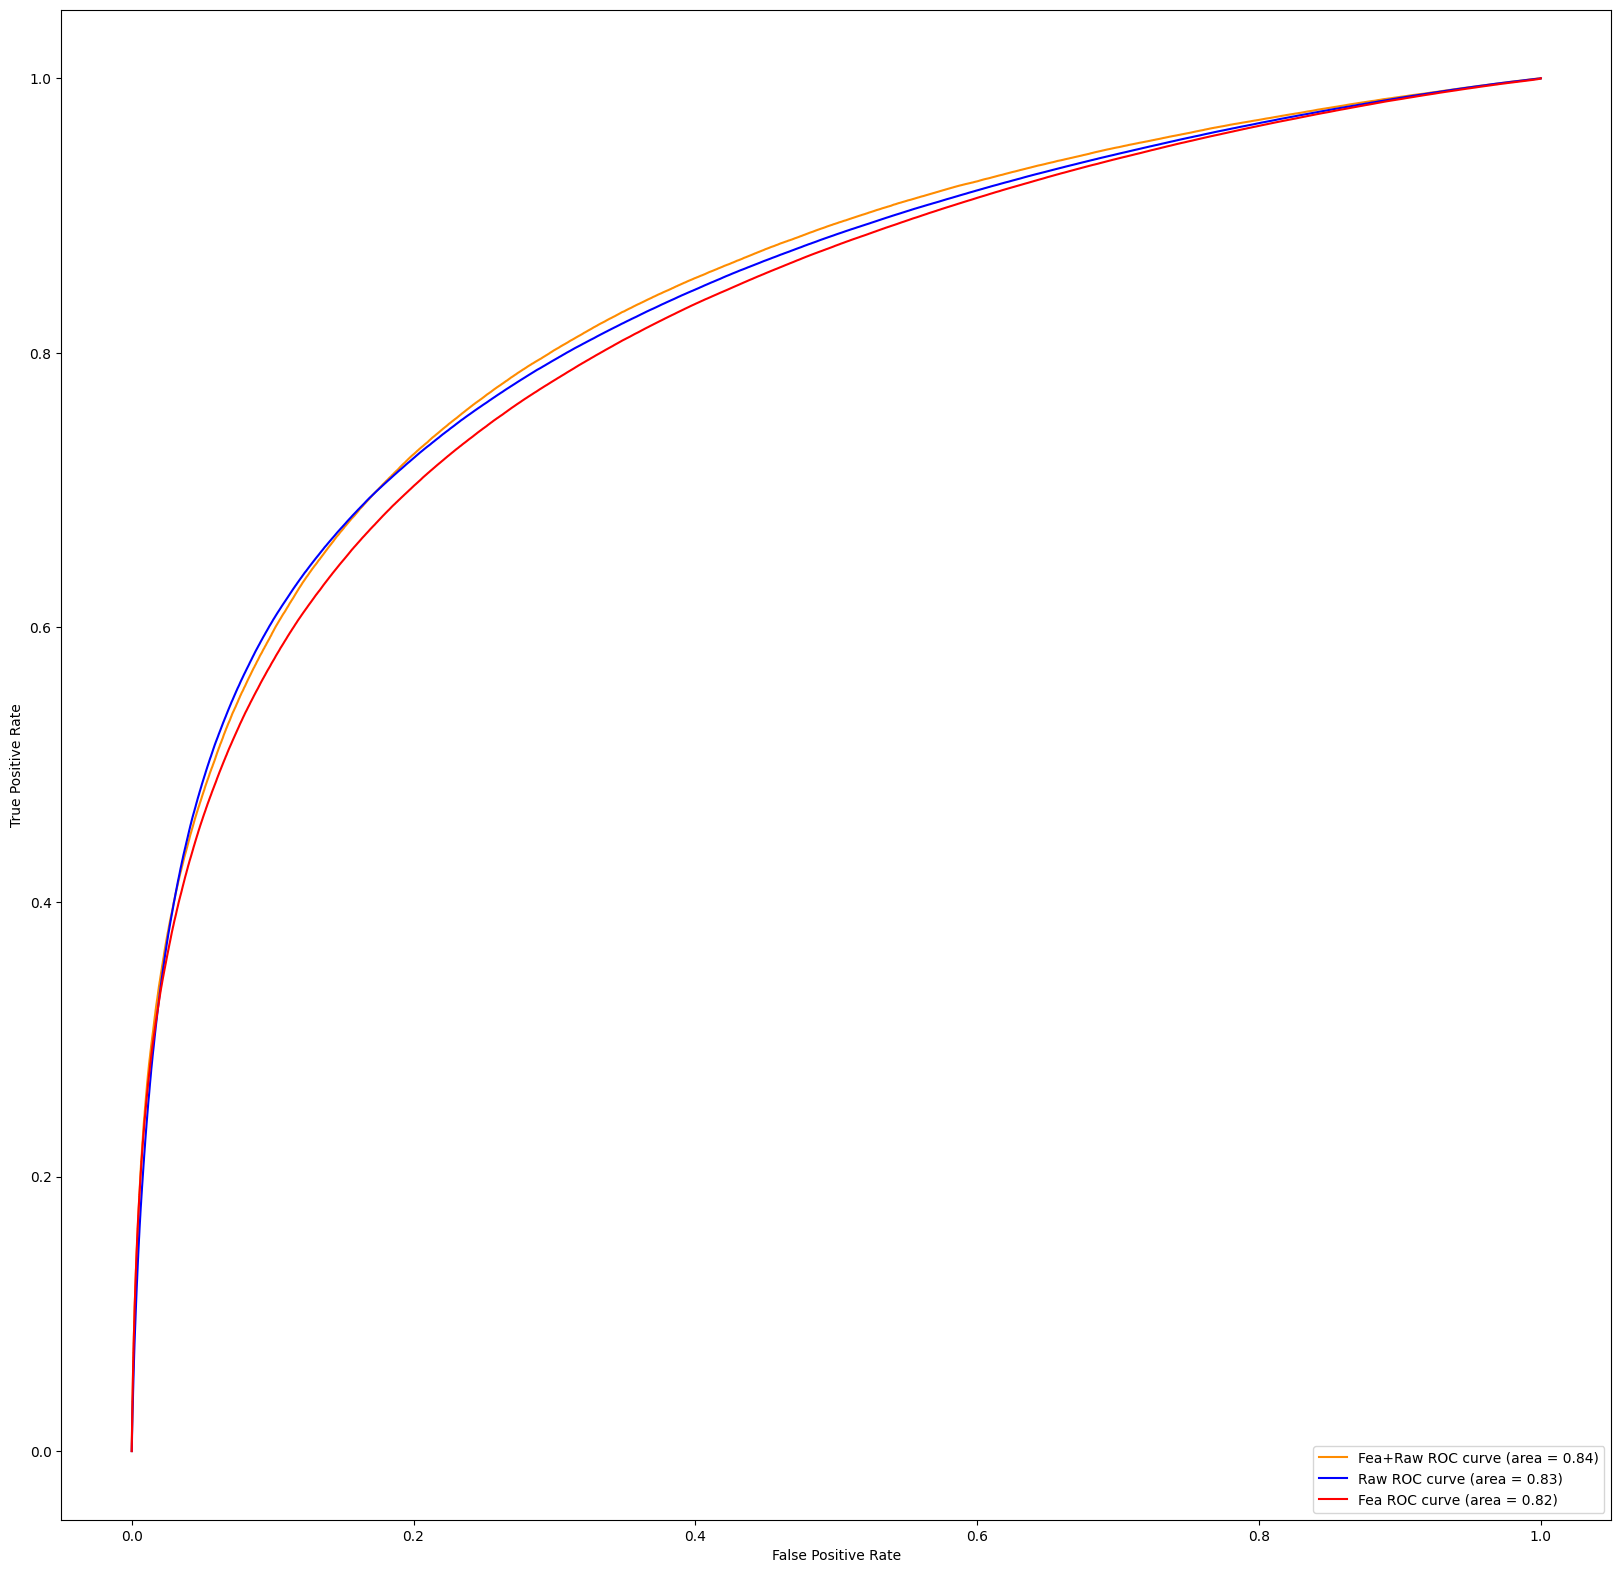

In [21]:
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))
roc_auc = auc(fpr, tpr)

rafpr, ratpr, _ = roc_curve(Raw_y_Train, RawFish.decision_function(Raw_X_Train))
raroc_auc = auc(rafpr, ratpr)

fefpr, fetpr, _ = roc_curve(Fea_y_Train, FeaFish.decision_function(Fea_X_Train))
feroc_auc = auc(fefpr, fetpr)

fig,ax = plt.subplots(figsize=[20,20], dpi = 100)
ax.plot(fpr,tpr,color='darkorange',label='Fea+Raw ROC curve (area = %0.2f)' % Teroc_auc)
ax.plot(rafpr,ratpr,color='blue',label='Raw ROC curve (area = %0.2f)' % raroc_auc)
ax.plot(fefpr,fetpr,color='red',label='Fea ROC curve (area = %0.2f)' % feroc_auc)
ax.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 3.

In [29]:
perc = linear_model.Perceptron()
perc.fit(X_Train,y_Train)

Perceptron()

In [40]:
tweereg = linear_model.TweedieRegressor()
tweereg.fit(X_Train,y_Train)

TweedieRegressor()

In [90]:
techniques = [Fisher, perc, tweereg]

In [27]:
colorlist =  ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']

In [120]:
def comparetech(techlist, testset):
    fig,(ax1, ax2) = plt.subplots(2, 1, figsize=[20,40], dpi = 100)
    for n, t in enumerate(techlist):
        try:
            fpr, tpr, _ = roc_curve(y_Test, t.decision_function(testset))
        except:
            pass
        try:
            fpr, tpr, _ = roc_curve(y_Test, t.predict(testset))
        except:
            pass
        roc_auc = auc(fpr, tpr)
        ax1.plot(fpr,tpr,color=colorlist[n%len(colorlist)],label=str(t)[:-2]+' ROC curve (area = %0.2f)' % roc_auc)
        ax1.legend(loc="lower right")
        ax1.set_xlabel('False Positive Rate')
        ax1.set_ylabel('True Positive Rate')
        to = tpr 
        bo = np.sqrt(np.add(tpr, fpr))
        sig = list()
        for c, _ in enumerate(bo):
            if _ == 0:
                sig.append(0)
            else:
                sig.append(np.divide(to[c], _))
        ax2.plot(sig,color=colorlist[n%len(colorlist)],label=str(t)[:-2]+' significance curve')
        ax2.legend(loc="lower right")
        ax2.set_xlabel('False Positive Rate')
        ax2.set_ylabel('True Positive Rate')
            
    plt.show()

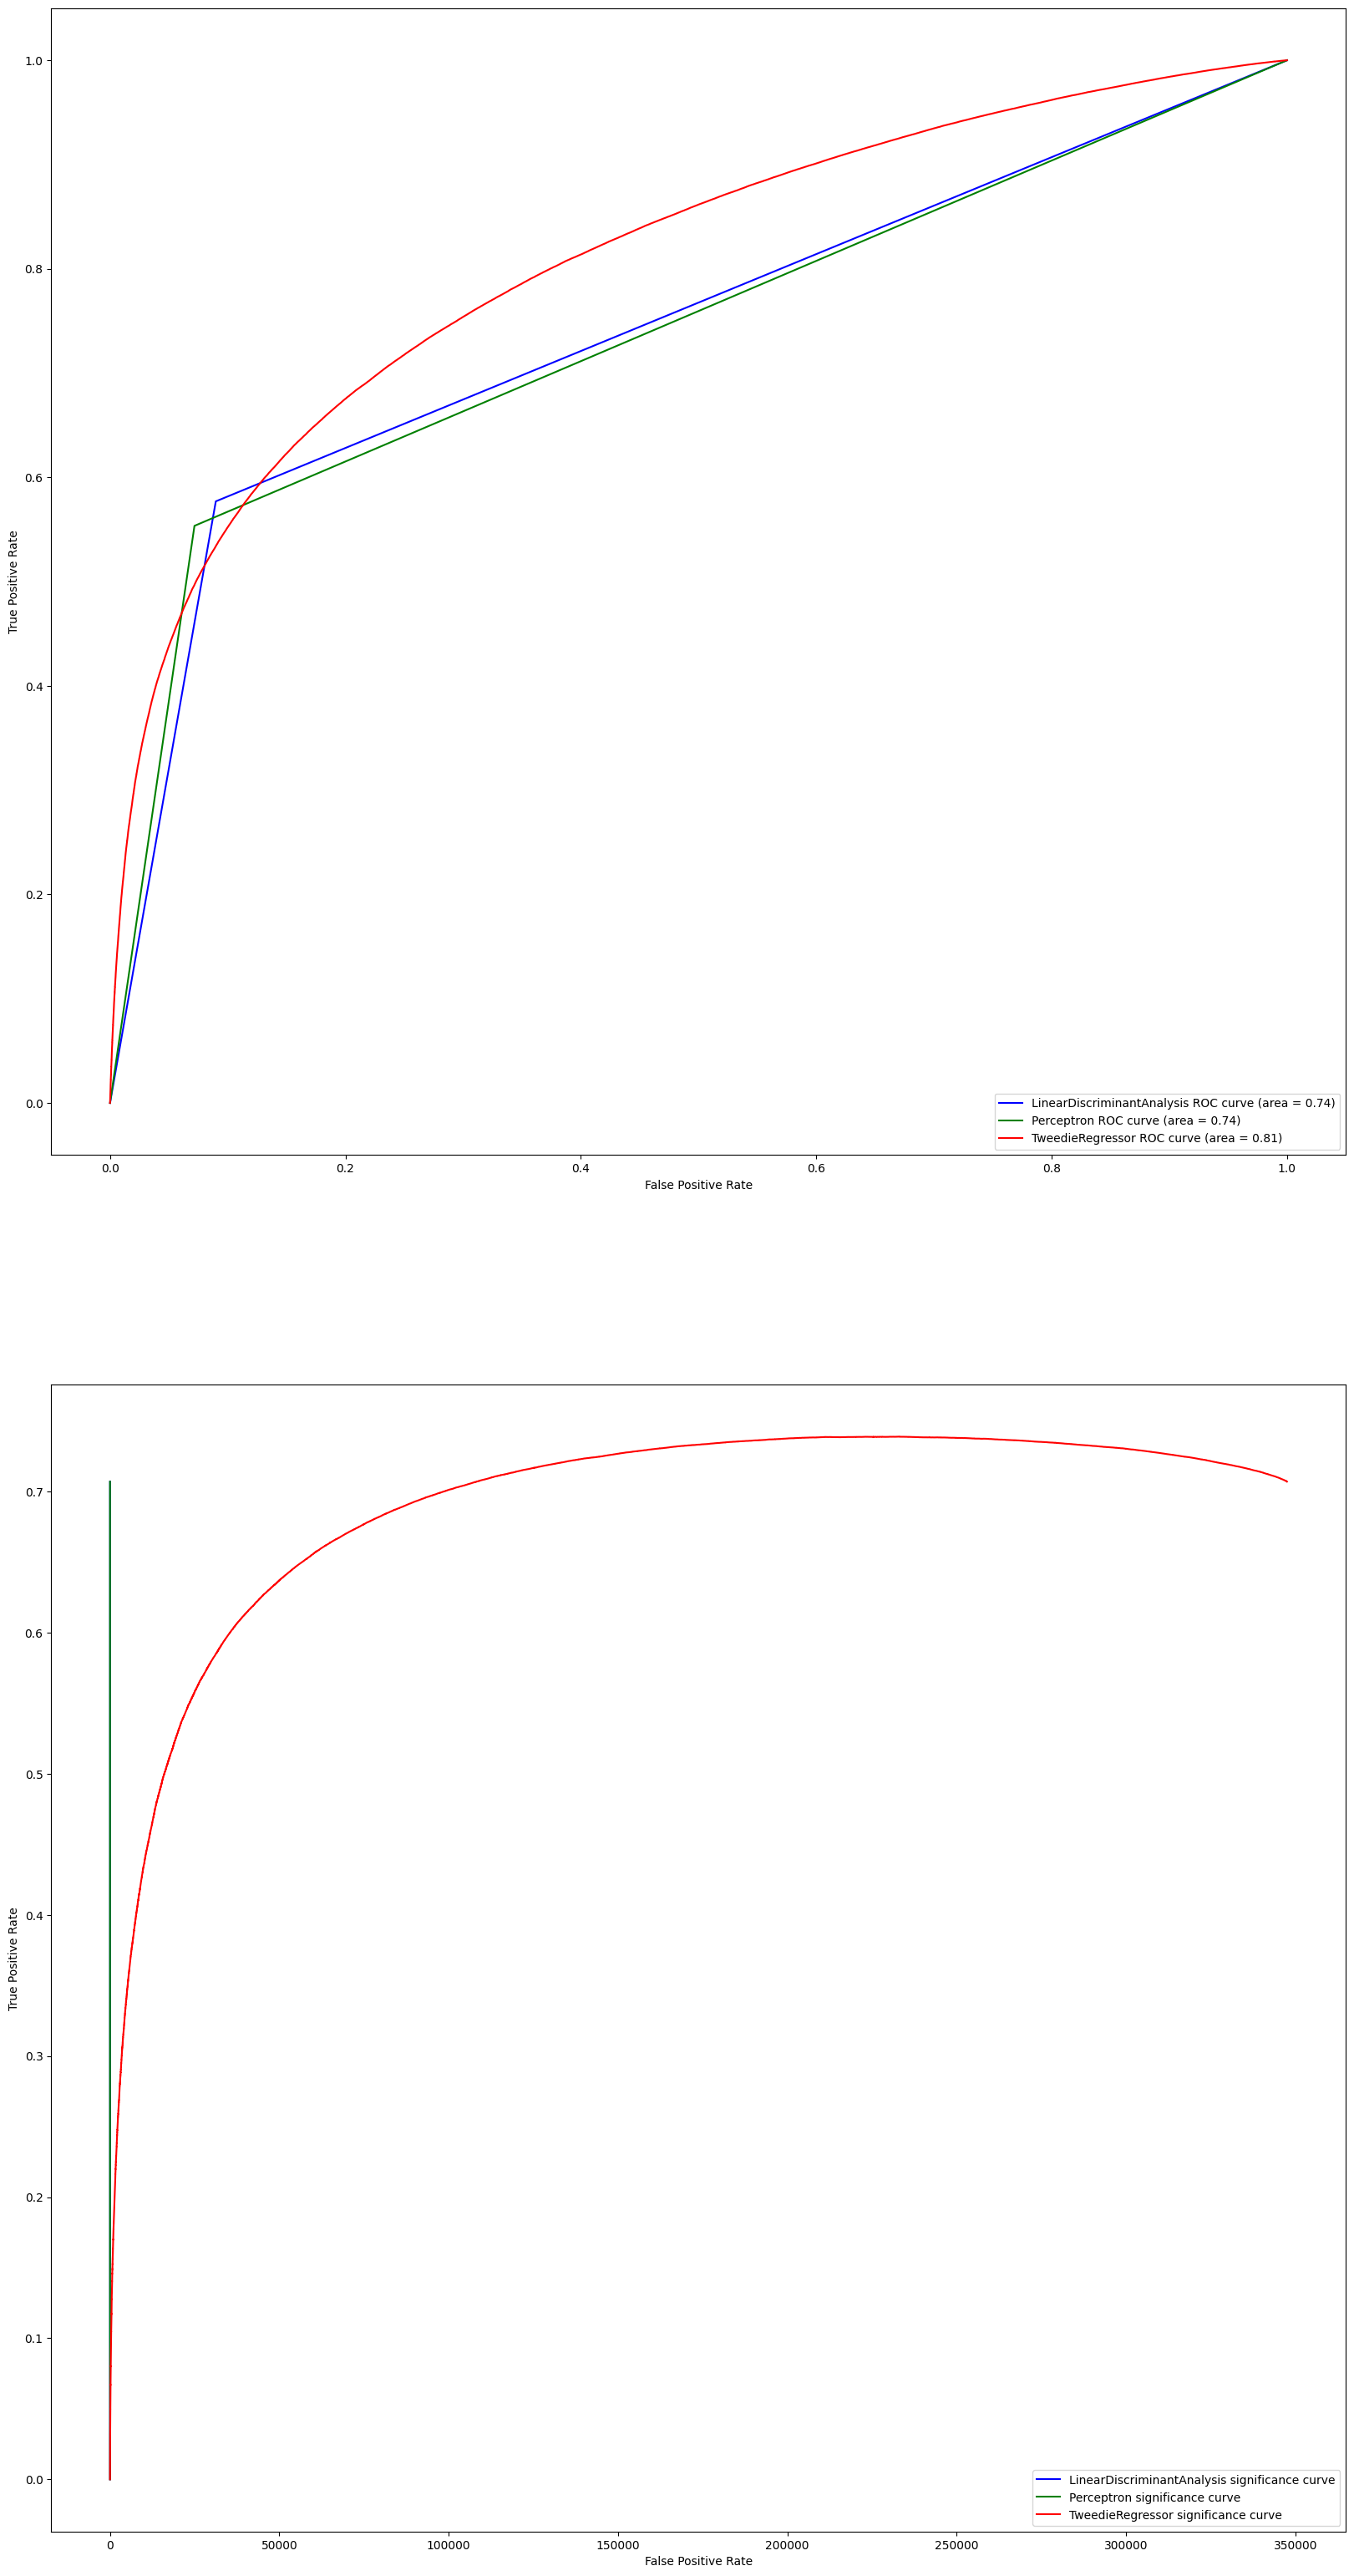

In [121]:
comparetech(techniques, X_Test)

### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

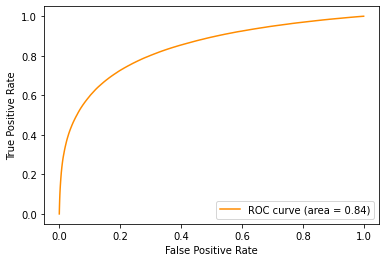

In [22]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance. 


In [110]:
from sklearn import metrics as mtr

In [141]:
computed = ['TPR', 'FPR', 'AUC', 'Precision', 'Recall', 'F1', 'Accuracy']
comp = list()
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))
comp.append(sum(tpr)/len(tpr))
comp.append(sum(fpr)/len(fpr))
roc_auc = mtr.roc_auc_score(y_Test, Fisher.decision_function(X_Test))
comp.append(roc_auc)
comp.append(mtr.precision_score(y_Test, Fisher.predict(X_Test)))
comp.append(mtr.recall_score(y_Test, Fisher.predict(X_Test)))
comp.append(mtr.f1_score(y_Test, Fisher.predict(X_Test)))
comp.append(mtr.accuracy_score(y_Test, Fisher.predict(X_Test)))
print(tabulate.tabulate([comp], headers=computed))

     TPR       FPR       AUC    Precision    Recall        F1    Accuracy
--------  --------  --------  -----------  --------  --------  ----------
0.724156  0.324394  0.836401     0.844491  0.576977  0.685562    0.757471
